In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file
data = pd.read_csv("/content/drive/MyDrive/data_modified.csv")
data1= pd.read_csv("/content/drive/MyDrive/data01.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data1.columns


Index(['Unnamed: 0', 'Date', 'Product line', 'Quantity', 'Holiday',
       'Crude_oil_Price', 'Gold_Price', 'Gold_price'],
      dtype='object')

In [4]:
data = pd.concat([data, data1['Date']], axis=1)

In [5]:
data.head()

,Product line,Quantity,Crude_oil_Price,Gold_Price,S&P_500_Price,Nasdaq_100_Price,Crude_oil_Price_lag1,Gold_Price_lag1,S&P_500_Price_lag1,Nasdaq_100_Price_lag1,Crude_oil_Price_mean_rolling,Gold_Price_mean_rolling,S&P_500_Price_mean_rolling,Nasdaq_100_Price_mean_rolling,Holiday_Indicator,var1,var2,var3,var4,Date
0,5,4,56.99,1292.95,2506.85,6902.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19.329363,13.085752,20.653565,22.679171,2019-01-05
1,4,8,56.99,1292.95,2506.85,6902.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,18.329363,12.085752,19.653565,21.679171,2019-03-03
2,1,9,56.99,1292.95,2506.85,6902.13,56.99,1292.95,2506.85,6902.13,NaN,NaN,NaN,NaN,1,15.329363,9.085752,16.653565,18.679171,2019-01-27
3,5,6,56.99,1292.95,2506.85,6902.13,56.99,1292.95,2506.85,6902.13,NaN,NaN,NaN,NaN,1,19.329363,13.085752,20.653565,22.679171,2019-02-08
4,0,10,56.99,1292.95,2506.85,6902.13,56.99,1292.95,2506.85,6902.13,56.99,1292.95,2506.85,6902.13,1,14.329363,8.085752,15.653565,17.679171,2019-02-25


In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.set_index('Date', inplace=True)
data.sort_values(by='Date', ascending=True,inplace=True)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [9]:
data

,Product line,Quantity,Crude_oil_Price,Gold_Price,S&P_500_Price,Nasdaq_100_Price,Crude_oil_Price_lag1,Gold_Price_lag1,S&P_500_Price_lag1,Nasdaq_100_Price_lag1,Crude_oil_Price_mean_rolling,Gold_Price_mean_rolling,S&P_500_Price_mean_rolling,Nasdaq_100_Price_mean_rolling,Holiday_Indicator,var1,var2,var3,var4
Date,,,,,,,,,,,,,,,,,,,
2019-01-01,0,3,59.265,1301.04,2789.65,7156.78,59.265,1301.04,2792.81,7150.83,59.265,1301.040,2791.546,7153.210,0,7.170919,4.082019,7.933671,8.875815
2019-01-01,3,7,56.990,1292.95,2506.85,6902.13,56.990,1292.95,2506.85,6902.13,56.990,1292.950,2506.850,6902.130,0,10.164682,7.042876,10.826782,11.839585
2019-01-01,3,10,56.920,1347.90,2784.70,7062.34,56.920,1347.90,2784.70,7062.34,56.588,1346.660,2782.724,7064.048,0,10.206303,7.041647,10.931895,11.862532
2019-01-01,3,5,56.990,1292.95,2506.85,6902.13,56.990,1292.95,2506.85,6902.13,56.990,1292.950,2506.850,6902.130,0,10.164682,7.042876,10.826782,11.839585
2019-01-01,5,10,59.265,1301.04,2804.30,7260.99,59.265,1301.04,2804.30,7260.99,59.116,1301.412,2807.936,7270.190,0,12.170919,9.082019,12.938909,13.890271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-29,0,9,56.090,1344.80,2779.76,7066.61,56.090,1344.80,2779.76,7066.61,56.070,1339.396,3250.224,7059.496,0,7.204001,4.026958,7.930120,8.863136
2019-03-30,3,4,59.940,1315.00,2818.46,7351.15,58.820,1322.60,2798.36,7316.96,59.044,1321.080,2802.380,7323.798,0,10.181592,7.093344,10.943946,11.902612
2019-03-30,4,8,59.040,1312.30,2800.71,7326.06,59.040,1312.30,2800.71,7326.06,59.228,1311.300,2811.544,7359.502,0,11.179537,8.078215,11.937628,12.899193


In [10]:
data.to_csv('/content/final_data.csv', index=False)

In [11]:
!pip install tensorflow scikit-learn


In [12]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

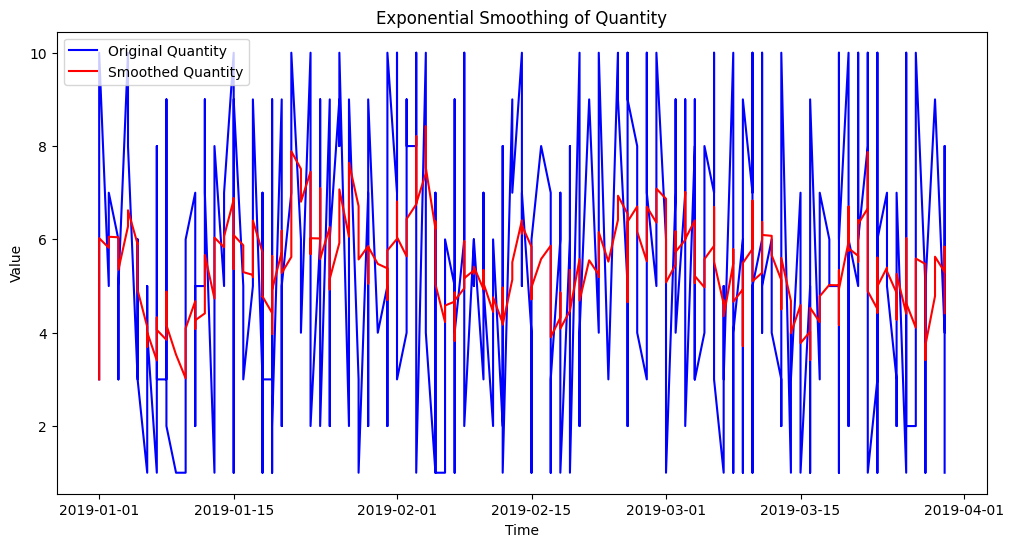

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your time series data (replace with your own dataset)
# Assume you have a DataFrame 'data' with a column named 'Quantity' (or any other relevant column)

# Apply exponential smoothing
alpha = 0.2 # Smoothing parameter (adjust as needed)
data['Smoothed_Quantity'] = data['Quantity'].ewm(alpha=alpha, adjust=False).mean()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Quantity'], label='Original Quantity', color='blue')
plt.plot(data.index, data['Smoothed_Quantity'], label='Smoothed Quantity', linestyle='solid', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing of Quantity')
plt.show()


In [14]:
data.head()

,Product line,Quantity,Crude_oil_Price,Gold_Price,S&P_500_Price,Nasdaq_100_Price,Crude_oil_Price_lag1,Gold_Price_lag1,S&P_500_Price_lag1,Nasdaq_100_Price_lag1,Crude_oil_Price_mean_rolling,Gold_Price_mean_rolling,S&P_500_Price_mean_rolling,Nasdaq_100_Price_mean_rolling,Holiday_Indicator,var1,var2,var3,var4,Smoothed_Quantity
Date,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,3,59.265,1301.04,2789.65,7156.78,59.265,1301.04,2792.81,7150.83,59.265,1301.040,2791.546,7153.210,0,7.170919,4.082019,7.933671,8.875815,3.0000
2019-01-01,3,7,56.990,1292.95,2506.85,6902.13,56.990,1292.95,2506.85,6902.13,56.990,1292.950,2506.850,6902.130,0,10.164682,7.042876,10.826782,11.839585,3.8000
2019-01-01,3,10,56.920,1347.90,2784.70,7062.34,56.920,1347.90,2784.70,7062.34,56.588,1346.660,2782.724,7064.048,0,10.206303,7.041647,10.931895,11.862532,5.0400
2019-01-01,3,5,56.990,1292.95,2506.85,6902.13,56.990,1292.95,2506.85,6902.13,56.990,1292.950,2506.850,6902.130,0,10.164682,7.042876,10.826782,11.839585,5.0320
2019-01-01,5,10,59.265,1301.04,2804.30,7260.99,59.265,1301.04,2804.30,7260.99,59.116,1301.412,2807.936,7270.190,0,12.170919,9.082019,12.938909,13.890271,6.0256


In [15]:
data= data.drop(['Crude_oil_Price'	,'Gold_Price',	'S&P_500_Price'	,'Nasdaq_100_Price', 'Crude_oil_Price_lag1',	'Gold_Price_lag1',	'S&P_500_Price_lag1','Nasdaq_100_Price_lag1',	'Crude_oil_Price_mean_rolling',	'Gold_Price_mean_rolling',	'S&P_500_Price_mean_rolling',	'Nasdaq_100_Price_mean_rolling'],axis=1)

In [16]:
data= data.drop(['Quantity'],axis=1)

In [17]:
# Define the split ratio
train_ratio = 0.8
test_ratio = 0.2

# Calculate the number of samples in each split
train_size = int(len(data) * train_ratio)
test_size = len(data) - train_size

# Shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

# Split the dataset
train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

Epoch 1/280


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 - 3s - 194ms/step - loss: 0.1301 - val_loss: 0.1510
Epoch 2/280
18/18 - 0s - 9ms/step - loss: 0.1287 - val_loss: 0.1505
Epoch 3/280
18/18 - 0s - 17ms/step - loss: 0.1285 - val_loss: 0.1496
Epoch 4/280
18/18 - 0s - 16ms/step - loss: 0.1268 - val_loss: 0.1498
Epoch 5/280
18/18 - 0s - 17ms/step - loss: 0.1273 - val_loss: 0.1497
Epoch 6/280
18/18 - 0s - 17ms/step - loss: 0.1255 - val_loss: 0.1510
Epoch 7/280
18/18 - 0s - 9ms/step - loss: 0.1269 - val_loss: 0.1495
Epoch 8/280
18/18 - 0s - 8ms/step - loss: 0.1249 - val_loss: 0.1502
Epoch 9/280
18/18 - 0s - 9ms/step - loss: 0.1245 - val_loss: 0.1494
Epoch 10/280
18/18 - 0s - 17ms/step - loss: 0.1251 - val_loss: 0.1494
Epoch 11/280
18/18 - 0s - 10ms/step - loss: 0.1249 - val_loss: 0.1519
Epoch 12/280
18/18 - 0s - 9ms/step - loss: 0.1236 - val_loss: 0.1493
Epoch 13/280
18/18 - 0s - 12ms/step - loss: 0.1233 - val_loss: 0.1495
Epoch 14/280
18/18 - 0s - 8ms/step - loss: 0.1231 - val_loss: 0.1496
Epoch 15/280
18/18 - 0s - 9ms/step - loss: 0.1

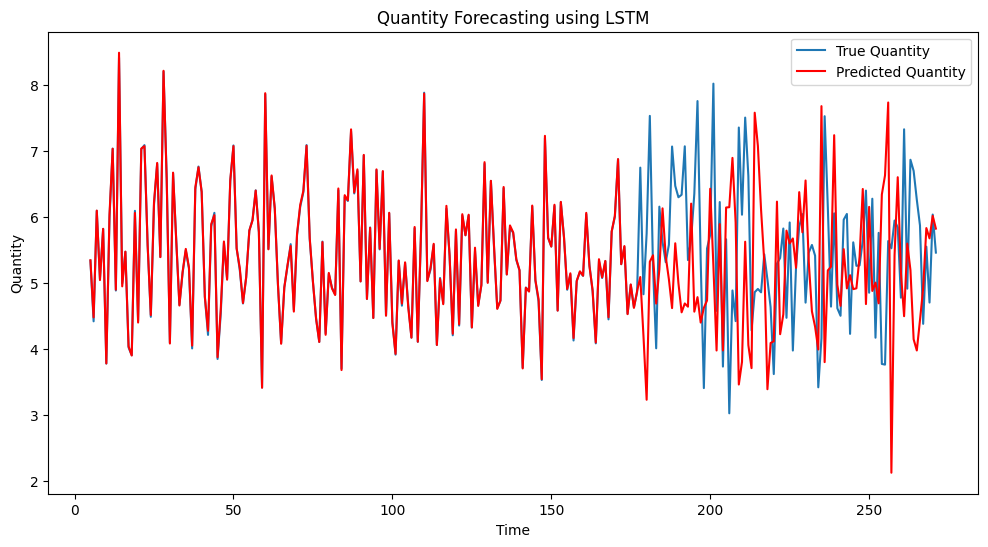

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
# Load your multivariate time series data (replace with your own dataset)
# Assume you have a DataFrame 'data' with columns: 'Smoothed_Quantity'
custom_lr = 0.003# Set your desired learning rate
optimizer = Adam(learning_rate=custom_lr)
# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(train_df[['Smoothed_Quantity']])

# Create input sequences and target values
window_size = 5
X, y = [], []
for i in range(len(train_df) - window_size):
    X.append(data_scaled[i:i + window_size])
    y.append(data_scaled[i + window_size])

X_train, y_train = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential([
    LSTM(units=64, input_shape=(window_size, 1), activation='relu', return_sequences=True),
    LSTM(units=32, activation='relu'),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=280, batch_size=10, verbose=2, validation_split=0.35)

# Make predictions
train_predictions = model.predict(X_train)

# Inverse transform predictions to original scale
train_predictions_original = scaler.inverse_transform(train_predictions)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_df.index[window_size:], train_df['Smoothed_Quantity'][window_size:], label='True Quantity')
plt.plot(train_df.index[window_size:], train_predictions_original[:, 0], label='Predicted Quantity', linestyle='solid', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Quantity Forecasting using LSTM')
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error
#train accuracy
mse = mean_squared_error(y_train, train_predictions_original)
print(f"MSE: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")
from sklearn.metrics import mean_absolute_error

# Assuming you have 'y_test' and 'y_pred_test_original'
mae = mean_absolute_error(y_train, train_predictions_original)
print(f"MAE: {mae:.4f}")

MSE: 30.4255
RMSE: 5.5159
MAE: 5.4511


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


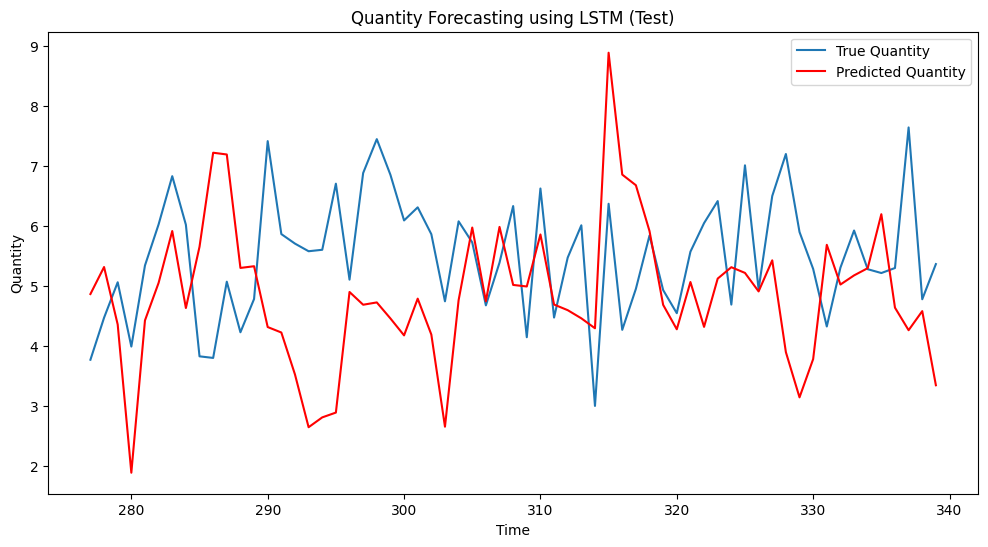

In [20]:
# Prepare the test data for predictions
test_scaled = scaler.fit_transform(test_df[['Smoothed_Quantity']])
X_test, y_test = [], []
for i in range(len(test_df) - window_size):
    X_test.append(test_scaled[i:i + window_size])
    y_test.append(test_scaled[i + window_size])

X_test, y_test = np.array(X_test), np.array(y_test)
# Make predictions on the test data
test_predictions = model.predict(X_test)

# Inverse transform test predictions to original scale
test_predictions_original = scaler.inverse_transform(test_predictions)

# Plotting the test results
plt.figure(figsize=(12, 6))
plt.plot(test_df.index[window_size:], test_df['Smoothed_Quantity'][window_size:], label='True Quantity')
plt.plot(test_df.index[window_size:], test_predictions_original[:, 0], label='Predicted Quantity', linestyle='solid', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Quantity Forecasting using LSTM (Test)')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
#test accuracy
mse = mean_squared_error(y_test,test_predictions_original)
print(f"MSE: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")
from sklearn.metrics import mean_absolute_error

# Assuming you have 'y_test' and 'y_pred_test_original'
mae = mean_absolute_error(y_test,test_predictions_original
)
print(f"MAE: {mae:.4f}")

MSE: 24.3123
RMSE: 4.9308
MAE: 4.7641
